# Shoes Classification using CNN

E-commerce has rapidly grown and their business strategies are completely based on user actions and user experiences. Although it is completely based on users, we should also not forget to say that there is a technology bridge in between users and growth in business. It may be Machine Learning or Deep Learning. Companies apply many image classification techniques on data to improve their catalog and give best suggestions to the users. They need accurate product classification on their platforms for better user experience. But when you talk about products, there exists a huge variety and classifying within varieties is really challenging. As a Deep Learning engineer, you should always try cracking these kinds of challenges by classifying things within a product itself.

**Goal:** Given the images of a product with multiple categories, train a model which can classify the type of a product.<br>

**Data Description:** Data is all about images of shoes with multiple categories and data is collected from a popular Ecommerce site. Data set consists of two folders train and test.
## Provided Files:
**Train:** train set consists of images belonging to 3 different categories of shoes in 3 different folders: Boots, Sandals and Slippers.<br>
**Test:** test set consists of images belonging to all 3 categories of shoes into a single folder.
## Instructions:
1. Train set should be used to feed the model.
2. Test set should be used to predict labels for test data.<br>

**Evaluation Criteria:** The evaluation metric for this problem statement is the Accuracy score where each shoe category is matched with the actual shoe label.

In [5]:
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Importing required libraries
import io
import os
# importing computer vision
import cv2
# importing tensor flow for Deep learning
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # import I/O files, data preprocessing
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
image_size = 200 # This 200 is just a number
path=r"D:\Imarticus\Deep Learning\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\train"
cate=['Boots','Sandals','Slippers'] # so the index for this is 0,1, and 2

input_image = []
for i in cate:
    folders = os.path.join(path,i)
    label = cate.index(i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders,image)
        image_array = cv2.imread(image_path)
        image_array =cv2.resize(image_array,(image_size,image_size))
        input_image.append([image_array,label])

In [3]:
# Finding how many images are there
len(input_image)

778

In [4]:
# splitting into X and y
np.random.shuffle(input_image) ## to shuffle the images
X = []
y = []
for X_values,labels in input_image:
    X.append(X_values)
    y.append(labels)
X=np.array(X)
y=np.array(y)

In [5]:
print(X.shape)
print(y.shape)

(778, 200, 200, 3)
(778,)


1


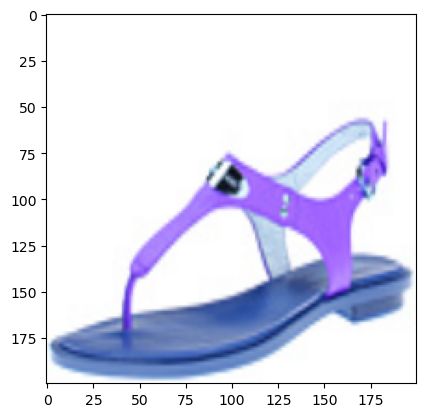

In [6]:
x=10
plt.imshow(X[x])
print(y[x])

In [7]:
# scaling the Independent variable
X=X/255

In [8]:
# importing required libraries for model building
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,BatchNormalization
from keras.layers import Dense,Flatten,Activation

# Building Conveloution Neural Network with actual data

In [9]:
model = Sequential()
model.add(Conv2D(filters = 16,kernel_size=(3,3),activation ='relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',input_shape = X.shape[1:]))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss ='sparse_categorical_crossentropy')
model.fit(X,y,epochs=10)

Epoch 1/10
25/25 [==============================] - 9s 318ms/step - loss: 9.0564
Epoch 2/10
25/25 [==============================] - 8s 311ms/step - loss: 0.4514
Epoch 3/10
25/25 [==============================] - 7s 298ms/step - loss: 0.2106
Epoch 4/10
25/25 [==============================] - 8s 308ms/step - loss: 0.1256
Epoch 5/10
25/25 [==============================] - 8s 307ms/step - loss: 0.0604
Epoch 6/10
25/25 [==============================] - 8s 324ms/step - loss: 0.0407
Epoch 7/10
25/25 [==============================] - 8s 323ms/step - loss: 0.0275
Epoch 8/10
25/25 [==============================] - 8s 306ms/step - loss: 0.0214
Epoch 9/10
25/25 [==============================] - 7s 298ms/step - loss: 0.0165
Epoch 10/10
25/25 [==============================] - 8s 309ms/step - loss: 0.0144


# Splitting the images from train_test split 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_test,X_train,y_test,y_train = train_test_split(X,y,train_size=0.2)

In [12]:
from keras.utils import to_categorical
from keras.layers import Convolution2D,MaxPooling2D,Dense,Dropout,Flatten

In [13]:
cnnmodel = Sequential()
cnnmodel.add(Convolution2D(filters = 32 ,kernel_size=(3,3),activation="relu",input_shape = X[0].shape,padding="same" ))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Convolution2D(filters = 64 ,kernel_size=(3,3),activation="relu",padding="same" ))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Convolution2D(filters = 128 ,kernel_size=(3,3),activation="relu",padding="same" ))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(128,activation="relu"))
cnnmodel.add(Dropout(0.4))
cnnmodel.add(Dense(3,activation="softmax"))
cnnmodel.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=['accuracy'])
cnnmodel1 = cnnmodel.fit(X_train,y_train,validation_split=0.2,epochs=12)

Epoch 1/12
16/16 [==============================] - 13s 753ms/step - loss: 1.8231 - accuracy: 0.5542 - val_loss: 0.4887 - val_accuracy: 0.7840
Epoch 2/12
16/16 [==============================] - 12s 728ms/step - loss: 0.4282 - accuracy: 0.8333 - val_loss: 0.3760 - val_accuracy: 0.8240
Epoch 3/12
16/16 [==============================] - 12s 723ms/step - loss: 0.2591 - accuracy: 0.8815 - val_loss: 0.2702 - val_accuracy: 0.9200
Epoch 4/12
16/16 [==============================] - 11s 678ms/step - loss: 0.2742 - accuracy: 0.8896 - val_loss: 0.3107 - val_accuracy: 0.8800
Epoch 5/12
16/16 [==============================] - 12s 732ms/step - loss: 0.1570 - accuracy: 0.9337 - val_loss: 0.3096 - val_accuracy: 0.9040
Epoch 6/12
16/16 [==============================] - 12s 741ms/step - loss: 0.1635 - accuracy: 0.9498 - val_loss: 0.3329 - val_accuracy: 0.8720
Epoch 7/12
16/16 [==============================] - 12s 748ms/step - loss: 0.1591 - accuracy: 0.9458 - val_loss: 0.2562 - val_accuracy: 0.9200

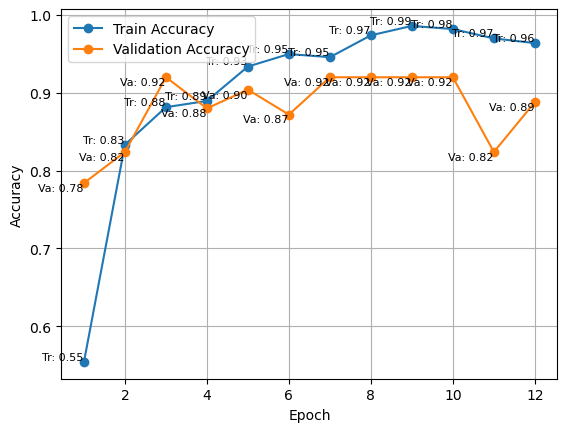

In [14]:
epochs = list(range(1, 13))
train_accuracy = cnnmodel1.history['accuracy'][:12]  # Truncate to match val_accuracy length
val_accuracy = cnnmodel1.history['val_accuracy'][:12]
# Plotting
plt.plot(epochs,train_accuracy, marker='o',linestyle='-',label="Train Accuracy")
plt.plot(epochs,val_accuracy, marker='o',linestyle='-',label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
# Annotate each point with its score and symbol
for epoch, train_score, val_score in zip(epochs, train_accuracy, val_accuracy):
    plt.text(epoch, train_score, f'Tr: {train_score:.2f}', ha='right', va='bottom', fontsize=8)
    plt.text(epoch, val_score, f'Va: {val_score:.2f}', ha='right', va='top', fontsize=8)
plt.show()

#### From the Above graph we can see the train accuracy and validation accuracy is incresing for every epoch and validataion accuracy also

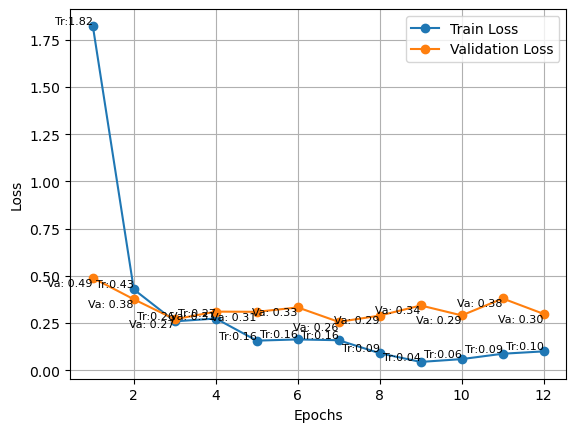

In [15]:
epochs = list(range(1, 13))
train_loss = cnnmodel1.history['loss'][:12]  # Truncate to match val_loss length
val_loss = cnnmodel1.history['val_loss'][:12]
# Plotting
plt.plot(epochs, train_loss, marker='o', linestyle='-', label="Train Loss")
plt.plot(epochs, val_loss, marker='o', linestyle='-', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
# Annotate each point with its score and symbol
for epoch, train_loss_score, val_loss_score in zip(epochs, train_loss, val_loss):
    plt.text(epoch, train_loss_score, f'Tr:{train_loss_score:.2f}',ha='right',va='bottom',fontsize=8)
    plt.text(epoch, val_loss_score, f'Va: {val_loss_score:.2f}', ha='right',va='top',fontsize=8)
plt.show()

#### From the above graph we see that the train loss was fall down at intial stage after every epoch the validation and train loss minior variation

# Importing test folder

In [16]:
image_size = 200
path1=r"D:\Imarticus\Deep Learning\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test"

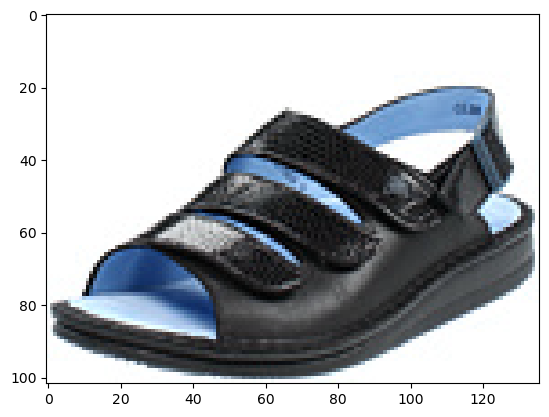

In [17]:
input_image = []
for image in os.listdir(path1):
        image_path = os.path.join(path1 , image)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        break
        image_array =cv2.resize(image_array,(image_size,image_size) )
        input_image.append(image_array)

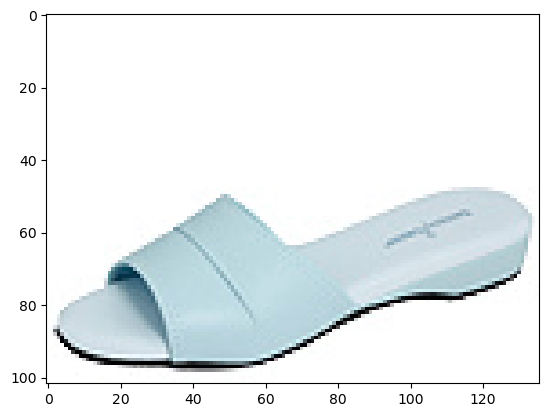

In [18]:
input_image = []
for image in os.listdir(path1):
        image_path = os.path.join(path1,image)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        image_array =cv2.resize(image_array,(image_size,image_size) )
        input_image.append(image_array)

In [19]:
len(input_image)

89

In [20]:
test = []
for test_values in input_image:
    test.append(test_values)
test=np.array(test)

In [21]:
test.shape

(89, 200, 200, 3)

In [22]:
test[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [23]:
# converting "uint8" dtype to "float32"
test=test.astype('float32')

In [24]:
test[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

# Predicted the data from overall model

In [25]:
pred=model.predict(test)

3/3 [==============================] - 0s 46ms/step


In [26]:
predicted_shoes=np.argmax(pred,axis=1)
print(predicted_shoes)

[1 0 0 2 0 2 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 2 2 1 1 2 1 1 2 2 0 2 2 2 2 1 1 1 1 0 1 0 2 1 1 2 2 1 2
 2 2 2 2 2 2 2 1 1 2 1 1 1 2 2]


In [ ]:
df1=pd.DataFrame(pred)
df1=df1.replace({0:'Boots',1:'Sandals',2:'Slippers'})
df1.to_csv('ShoePrediction1.csv')

# predicted the data from train_test_split model

In [28]:
pred_1=cnnmodel.predict(test)

3/3 [==============================] - 0s 109ms/step


In [29]:
predicted_shoes_1=np.argmax(pred_1,axis=1)
print(predicted_shoes)

[1 0 0 2 0 2 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 2 2 1 1 2 1 1 2 2 0 2 2 2 2 1 1 1 1 0 1 0 2 1 1 2 2 1 2
 2 2 2 2 2 2 2 1 1 2 1 1 1 2 2]


In [ ]:
df=pd.DataFrame(pred_1)
df=df.replace({0:'Boots',1:'Sandals',2:'Slippers'})
df.to_csv('ShoePrediction.csv')